In [1]:
import torch
import requests
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

from lavis import *


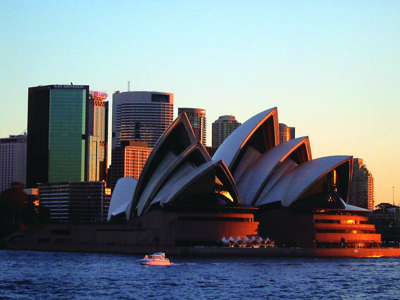

what is name of this place?


In [2]:
img_url = 'https://images.freeimages.com/images/large-previews/2a0/sydney-opera-house-1452627.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
# raw_image = Image.open("./demo.png").convert("RGB")
display(raw_image.resize((400, 300)))
question = "what is name of this place?"
print(question)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
from lavis.models import load_model_and_preprocess
model, vis_processors, txt_processors = load_model_and_preprocess(name="pnp_vqa", model_type="base", is_eval=True, device=device)

In [5]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)

samples = {"image": image, "text_input": [question]}

In [6]:
samples = model.forward_itm(samples=samples)

In [7]:
#image captioning

samples = model.forward_cap(samples=samples, num_captions=50, num_patches=20)
print('Examples of question-guided captions: ')
samples['captions'][0][:5]

Examples of question-guided captions: 


['a boat is out on the water with a boat in the background',
 'a boat sails through the waters with the opera structure',
 'a city has a building with two tall buildings',
 'a boat is in front of a large building',
 'a boat going on the water in front of a large sydney opera theatre building to']

In [8]:
pred_answers = model.forward_qa(samples, num_captions=50)
print('Question: {} \nPredicted answer: {}'.format(question, pred_answers[0]))

Question: what is name of this place? 
Predicted answer: opera house


In [9]:
pred_answers

['opera house']

In [10]:
#UI BUILDING PART

In [11]:
import gradio as gr

In [12]:

def input_image(img_link , question_text):
    img_url = img_link
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
    display(raw_image.resize((400, 300)))
    question = question_text
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model, vis_processors, txt_processors = load_model_and_preprocess(name="pnp_vqa", model_type="base", is_eval=True, device=device)
    image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    question = txt_processors["eval"](question)
    samples = {"image": image, "text_input": [question]}
    samples = model.forward_itm(samples=samples)
    samples = model.forward_cap(samples=samples, num_captions=50, num_patches=20)
    print("telling about the given image...generating contexts")
    samples['captions'][0][:5]
    pred_answers = model.forward_qa(samples, num_captions=50)
    return pred_answers[0] , raw_image
    
    
    

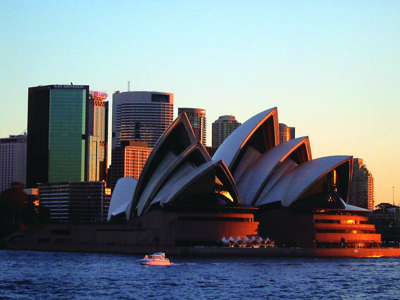

telling about the given image...generating contexts
('opera house', <PIL.Image.Image image mode=RGB size=1248x928 at 0x23A2DDDBD60>)


In [13]:
print(input_image('https://images.freeimages.com/images/large-previews/2a0/sydney-opera-house-1452627.jpg' , "what is name of this place?" ))

In [14]:
#interface = gr.Interface(fn = input_image , inputs = [gr.inputs.Image(shape=(200,200)) , gr.inputs.Textbox(lines=5 , placeholder = "Type your question")] , outputs = "text")

In [15]:
examples = [
    ["image_url = https://images.freeimages.com/images/large-previews/2ca/fall-1171254.jpg"],
    ["Question = What is the color of leaves?"],
]
gr.Markdown("""<h1><center>Visual Multi Model GAN</center></h1>""")
interface = gr.Interface(
    fn = input_image , 
    inputs = [gr.Textbox(lines=2, placeholder="Type URL") , gr.Textbox(lines=5 , placeholder = "Type your question")] , 
    outputs = ["text" , gr.Image(raw_image)] , title = "Visual Multi Model GAN" , 
    theme='HaleyCH/HaleyCH_Theme' , 
    examples = examples
)

In [16]:
#link= https://images.freeimages.com/images/large-previews/2ca/fall-1171254.jpg

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


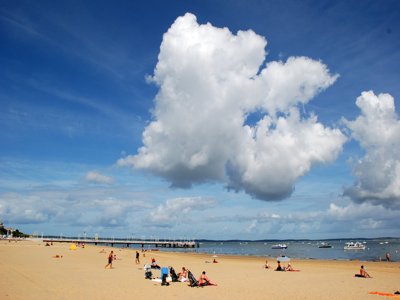

telling about the given image...generating contexts


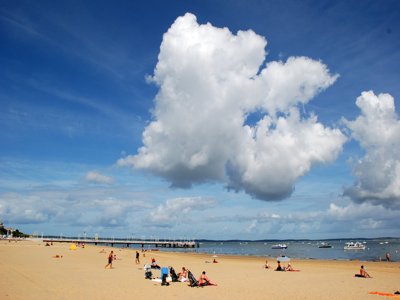

telling about the given image...generating contexts


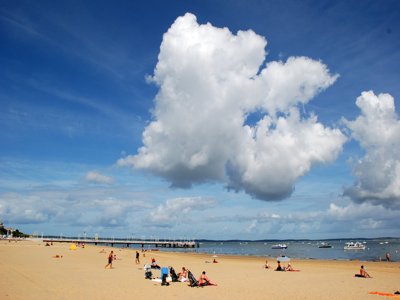

telling about the given image...generating contexts


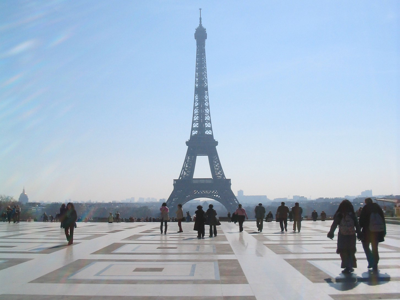

telling about the given image...generating contexts


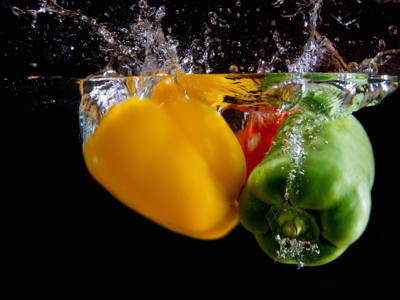

telling about the given image...generating contexts


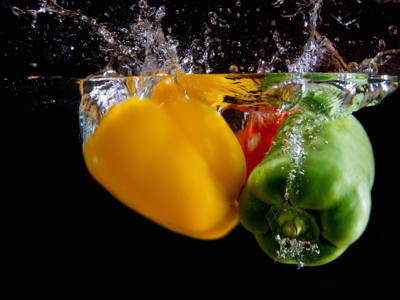

telling about the given image...generating contexts


In [17]:
interface.launch()

In [18]:
interface.close()

Closing server running on port: 7860
